In [33]:
import pandas as pd
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [34]:
df.isnull().sum()
df.dropna(inplace=True) 


In [35]:
df = pd.get_dummies(df, columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type'], drop_first=True)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Distance', 'Order_Cost']] = scaler.fit_transform(df[['Distance', 'Order_Cost']])


In [37]:
df.describe()


,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000
mean,-1.643130e-16,5.250000,3.738500,3.686500,70.494950,-2.042810e-16,46.616650
std,1.002509e+00,2.745027,0.703021,0.697063,29.830694,1.002509e+00,29.361706
min,-1.608593e+00,1.000000,2.500000,2.600000,15.230000,-1.688954e+00,1.240000
25%,-7.924313e-01,3.000000,3.200000,3.100000,46.997500,-9.013569e-01,21.602500
50%,-1.806765e-01,5.000000,3.800000,3.700000,72.775000,-1.925947e-02,47.530000
75%,7.325599e-01,8.000000,4.300000,4.300000,96.650000,9.076026e-01,70.245000
max,1.963762e+00,10.000000,5.000000,5.000000,119.670000,1.737826e+00,99.740000


In [38]:
# Check data types
print(df.dtypes)

#  missing values
print(df.isnull().sum())


Order_ID                       object
Customer_Location              object
Restaurant_Location            object
Distance                      float64
Delivery_Person_Experience      int64
Order_Priority                 object
Order_Time                     object
Restaurant_Rating             float64
Customer_Rating               float64
Delivery_Time                 float64
Order_Cost                    float64
Tip_Amount                    float64
Weather_Conditions_Rainy         bool
Weather_Conditions_Snowy         bool
Weather_Conditions_Sunny         bool
Traffic_Conditions_Low           bool
Traffic_Conditions_Medium        bool
Vehicle_Type_Bike                bool
Vehicle_Type_Car                 bool
dtype: object
Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Restaurant_Rating             0
Customer

In [39]:
# Convert categorical columns to numeric 
df_encoded = pd.get_dummies(df, drop_first=True)


In [40]:
# correlation matrix (EDA)
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                            Distance  Delivery_Person_Experience  \
Distance                    1.000000                    0.017562   
Delivery_Person_Experience  0.017562                    1.000000   
Restaurant_Rating           0.064676                   -0.004492   
Customer_Rating             0.003430                   -0.122447   
Delivery_Time              -0.075143                   -0.019098   
...                              ...                         ...   
Order_Priority_Low          0.034922                   -0.033004   
Order_Priority_Medium      -0.058813                   -0.157654   
Order_Time_Evening         -0.101889                    0.039440   
Order_Time_Morning          0.244674                   -0.118679   
Order_Time_Night            0.076386                   -0.005466   

                            Restaurant_Rating  Customer_Rating  Delivery_Time  \
Distance                             0.064676         0.003430      -0.075143   
Delivery_Person_Exper

In [41]:
# outlier detection by using inter quartile range and z-score method but we use IQR here .
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} → Outliers Detected: {len(outliers)}")


Distance → Outliers Detected: 0
Delivery_Person_Experience → Outliers Detected: 0
Restaurant_Rating → Outliers Detected: 0
Customer_Rating → Outliers Detected: 0
Delivery_Time → Outliers Detected: 0
Order_Cost → Outliers Detected: 0
Tip_Amount → Outliers Detected: 0


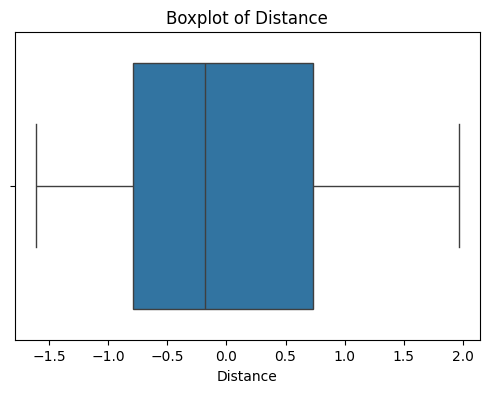

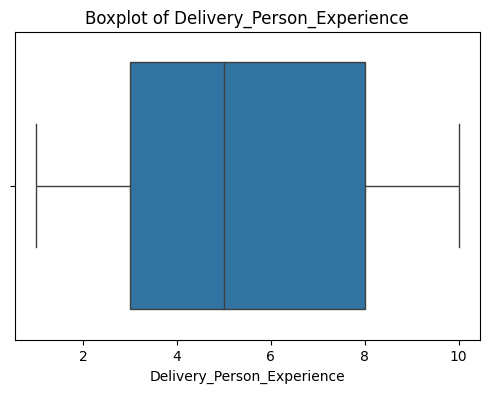

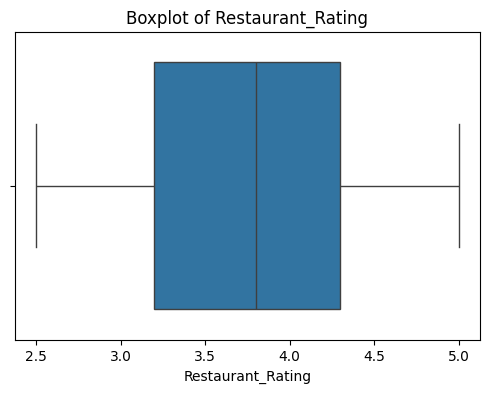

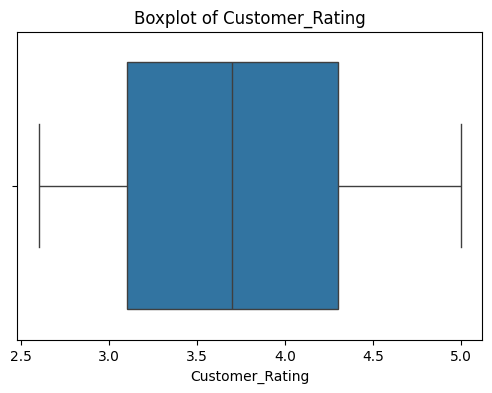

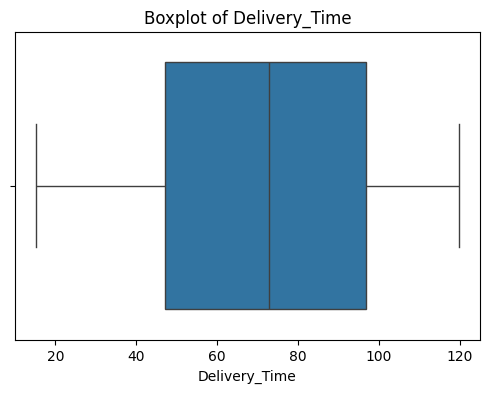

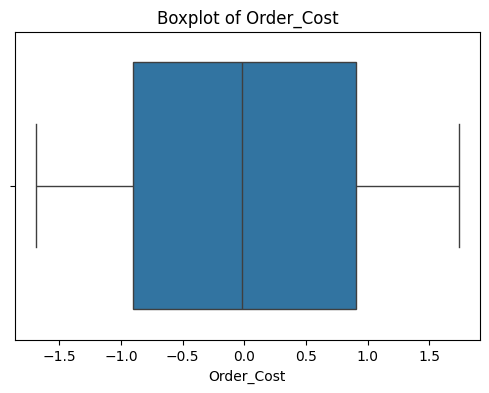

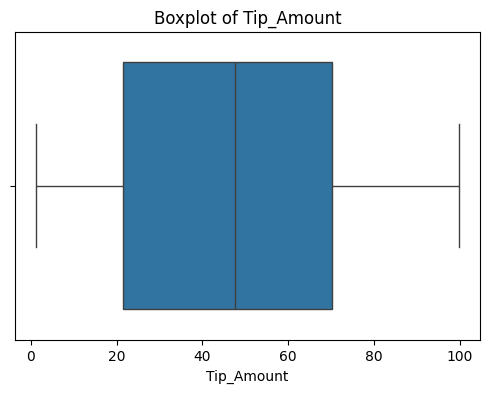

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [43]:
# linear regression model :train-test-split 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


X = df.drop(columns=["Order_ID", "Customer_Location", "Restaurant_Location", "Delivery_Time"])
y = df["Delivery_Time"]

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  
)


X_processed = preprocessor.fit_transform(X)

# 80% training and 20% training
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((160, 18), (40, 18), (160,), (40,))

In [44]:
#model building : linear regression 
#evaluation matrics 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1021.9359676315064, -0.104925592549449)

In [45]:
# logistic regression model (for caegorization )
# model objectives 
# model implementation 
# evaluation matrix : Accuracy , precission, recall , f1 score amnd confusion matrix


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


median_delivery_time = df["Delivery_Time"].median()
df["Delivery_Status"] = df["Delivery_Time"].apply(lambda x: "Fast" if x <= median_delivery_time else "Delayed")


X_bin = df.drop(columns=["Order_ID", "Customer_Location", "Restaurant_Location", "Delivery_Time", "Delivery_Status"])
y_bin = df["Delivery_Status"]


categorical_cols_bin = X_bin.select_dtypes(include=['object']).columns.tolist()
preprocessor_bin = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols_bin)
    ],
    remainder='passthrough'
)

X_bin_processed = preprocessor_bin.fit_transform(X_bin)

# Train-test split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bin_processed, y_bin, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Xb_train, yb_train)

# Predictions
yb_pred = log_reg.predict(Xb_test)

# Evaluation metrics
accuracy = accuracy_score(yb_test, yb_pred)
precision = precision_score(yb_test, yb_pred, pos_label="Fast")
recall = recall_score(yb_test, yb_pred, pos_label="Fast")
f1 = f1_score(yb_test, yb_pred, pos_label="Fast")
conf_matrix = confusion_matrix(yb_test, yb_pred)

accuracy, precision, recall, f1, conf_matrix


(0.4,
 0.3684210526315789,
 0.3684210526315789,
 0.3684210526315789,
 array([[ 9, 12],
        [12,  7]]))

In [46]:
# Updated : classification_report() and ROC curve 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


median_time = df['Delivery_Time'].median()
df['Delivery_Class'] = (df['Delivery_Time'] > median_time).astype(int)  


X = df.drop(columns=['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Order_Time',
                     'Delivery_Time', 'Delivery_Class'])  
y = df['Delivery_Class']


X_encoded = X.copy()
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification report and confusion matrix
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

report, conf_matrix, fpr, tpr, roc_auc


({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19.0},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 40.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 40.0}},
 array([[19,  0],
        [ 0, 21]]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10526316, 0.15789474, 0.31578947, 0.36842105, 0.47368421,
        0.52631579, 0.63157895, 0.68421053, 0.78947368, 0.89473684,
        1.        ]),
 array([0.        , 0.04761905, 0.0952381 , 0.19047619, 0.33333333,
        0.52380952, 0.71428571, 0.76190476, 0.85714286, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 np.float64(1

In [47]:
# Final Report:

The Food Delivery Time Prediction project aimed to estimate delivery times using factors like distance, weather, traffic, and delivery experience. 
The dataset included 200 entries with variables such as customer and restaurant locations, traffic and weather conditions, delivery experience,
order priority, and cost. Data preprocessing involved handling missing values (none were found), encoding categorical variables using one-hot encoding,
and normalizing numeric features for consistency. Exploratory Data Analysis revealed meaningful correlations, and outliers were assessed using boxplots.
Feature engineering included creating time-based features and calculating delivery distances. A Linear Regression model was trained to predict 
continuous delivery time and evaluated using MSE, MAE, and R² metrics, while a Logistic Regression model classified deliveries as "Fast" or "Delayed" 
using traffic, weather, and experience-related features, evaluated via accuracy, precision, recall, and F1-score. Model comparisons showed complementary
strengths in regression and classification tasks. Actionable insights from the analysis include optimizing delivery routes, improving staff training,
and scheduling more delivery personnel during high-traffic hours to reduce delays and improve service efficiency.

SyntaxError: invalid character '²' (U+00B2) (1937976530.py, line 8)